##### 魔術棒填充顏色 ( floodFill )
這篇教學會介紹 OpenCV 的 floodFill 方法 ( 洪水填充、魔術棒填充 )，透過這個方法，可以將影像中某個像素周圍顏色類似的像素，\
填滿相同的顏色，實現類似 Photoshop 或其他繪圖軟體中的「魔術棒填充」功能。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### floodFill 的用法 
floodFill 方法可以將影像中某個像素周圍顏色類似的像素 ( 定義顏色最高與最低之間的範圍 )，填滿相同的顏色，使用後會直接改變來源影像，使用方法如下：

In [ ]:
cv2.floodFill(img, mask, seedPoint, newVal, loDiff, upDiff, flags)

相關參數說明如下：

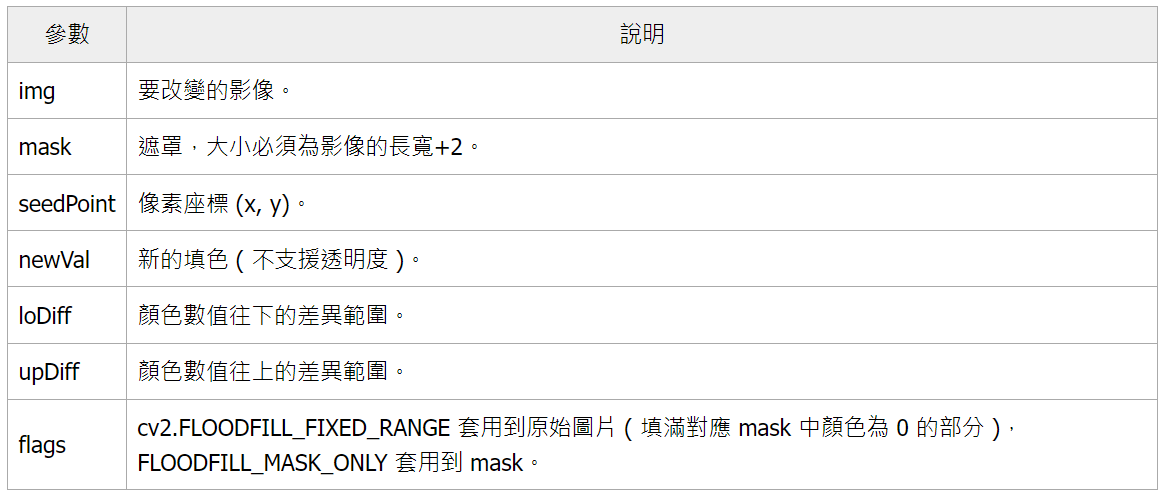

##### 使用 floodFill 快速填色 
為了避免使用後改變了原始影像 ( 使用 floodFill 會直接改變原始影像 )，可以額外定義一個函式進行處理，函式一開始先複製來源影像，\
處理後再將影像回傳，處理的過程如下：

* seedPoint 取得影像 (100, 10) 位置的顏色資訊。
* newVal 預備將類似 ( 並連結在一起 ) 的顏色換成紅色 (0,0,255)。
* 顏色範圍往下藍色 100，綠色 100，紅色 60，例如原始顏色 (100,100,100)，則往下到 (0,0,40) 都會被選取。
* 顏色範圍往上藍色 100，綠色 100，紅色 100，例如原始顏色 (100,100,100)，則往下到 (200,200,200) 都會被選取。

完成後執行，就可以看到影像的某一部分變成了紅色。

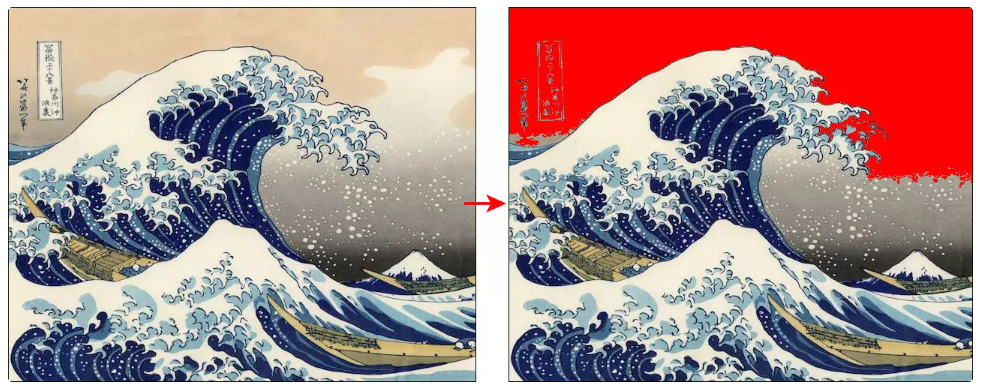

In [1]:
import cv2
import numpy as np

img = cv2.imread('meme_1.jpg')

def floodFill(source, mask, seedPoint, newVal, loDiff, upDiff, flags=cv2.FLOODFILL_FIXED_RANGE):
    result = source.copy()
    cv2.floodFill(result, mask=mask, seedPoint=seedPoint, newVal=newVal, loDiff=loDiff, upDiff=upDiff, flags=flags)
    return result

h, w = img.shape[:2]                     # 取得原始影像的長寬
mask = np.zeros((h+2,w+2,1), np.uint8)   # 製作 mask，長寬都要加上 2
output = floodFill(img, mask, (100,10), (0,0,255), (100,100,60), (100,100,100))

cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

延續上方的程式，如果遮罩中有白色有黑色，則會填滿對應到黑色的區域。

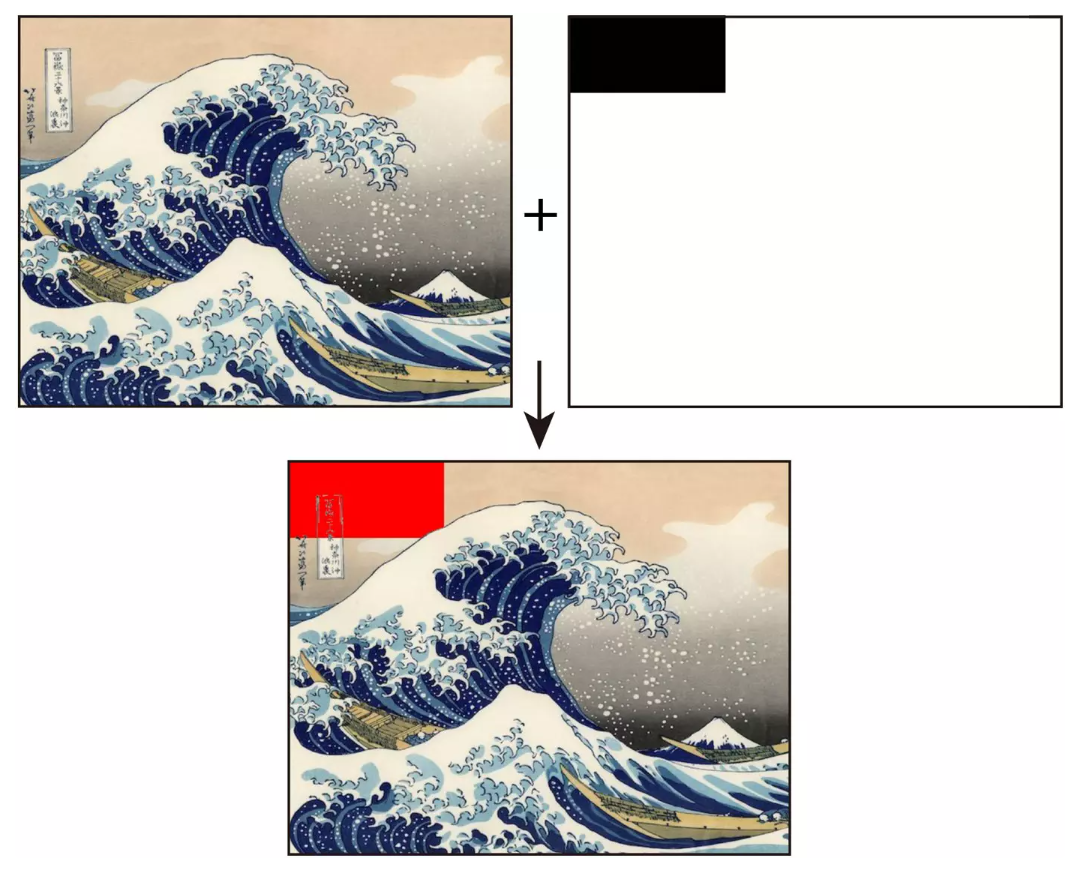

In [2]:
import cv2
import numpy as np

img = cv2.imread('meme_1.jpg')

def floodFill(source, mask, seedPoint, newVal, loDiff, upDiff, flags=cv2.FLOODFILL_FIXED_RANGE):
    result = source.copy()
    cv2.floodFill(result, mask=mask, seedPoint=seedPoint, newVal=newVal, loDiff=loDiff, upDiff=upDiff, flags=flags)
    return result

h, w = img.shape[:2]
mask = np.zeros((h+2,w+2,1), np.uint8)  # 全黑遮罩
mask = 255 - mask                       # 變成全白遮罩
mask[0:100,0:200] = 0                   # 將左上角長方形變成黑色
output = floodFill(img, mask, (100,10), (0,0,255), (100,100,60), (200,200,200))

cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()